# 1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

# 2. Data Collection

Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

2.1 Import Data, Required Packages and the csv file

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv('studentsperformance.csv')

In [28]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [29]:
df.shape

(1000, 8)

2.2 Dataset information
gender : sex of students -> (Male/female)
race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
lunch : having lunch before test (standard or free/reduced)
test preparation course : complete or not complete before test
math score
reading score
writing score

# 3. Data Checks to perform

3.1 Check Missing values

In [30]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

3.2 Check Duplicates

In [31]:
df.duplicated().sum()

0

3.3 Check data types

In [32]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4 Checking the number of unique values of each column

In [33]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

3.5 Check statistics of data set

In [34]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight : 
From above description of numerical data, all means are very close to each other - between 66 and 68.05;
All standard deviations are also close - between 14.6 and 15.19;
While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

3.7 Exploring Data

In [35]:
print('categories in gender variable : ', end = "   ")
print(df.gender.unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df.lunch.unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

categories in gender variable :    ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [36]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
numerical_features

['math score', 'reading score', 'writing score']

In [37]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

3.8 Adding columns for "Total Score" and "Average"

In [38]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score']/3
df.head(1)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667


3.9 Finding how many students have full marks in the subject and less than 20 marks in the subject (EXTREMES)

In [39]:
reading_full = df[df['reading score'] == 100]['average'].count()
reading_full

17

In [40]:
writing_full = df[df['writing score'] == 100]['average'].count()
writing_full

14

In [41]:
math_full = df[df['math score'] == 100]['average'].count()
math_full

7

In [42]:
reading_lessThan20 = df[df['reading score'] <=20]['average'].count()
reading_lessThan20

1

In [43]:
writing_lessThan20 = df[df['writing score'] <=20]['average'].count()
writing_lessThan20

3

In [44]:
math_lessThan20 = df[df['math score'] <=20]['average'].count()
math_lessThan20

4

Insights
From above values we get students have performed the worst in Maths
Best performance is in reading section

# 4. Exploring Data ( Visualization )
4.1 Visualize average score distribution to make some conclusion.
Histogram
Kernel Distribution Function (KDE)

<AxesSubplot:xlabel='average', ylabel='Count'>

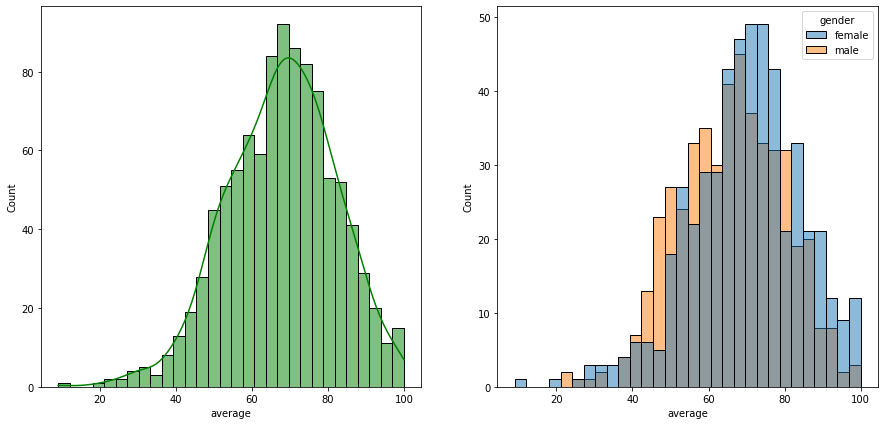

In [45]:
fig, axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df, x = 'average',bins = 30,kde = True, color='g')
plt.subplot(122)
sns.histplot(data=df, x = 'average',bins = 30, hue = 'gender')

4.1 Visualize total score distribution to make some conclusion.

<AxesSubplot:xlabel='total_score', ylabel='Count'>

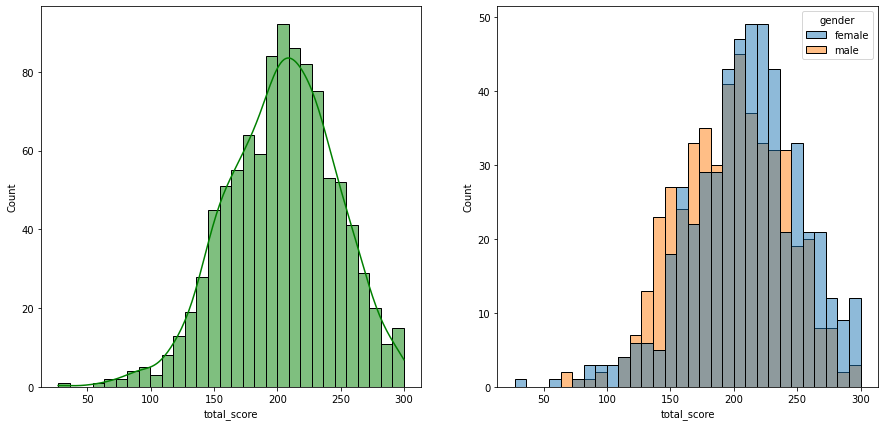

In [46]:
fig, axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df, x = 'total_score',bins = 30,kde = True, color='g')
plt.subplot(122)
sns.histplot(data=df, x = 'total_score',bins = 30, hue = 'gender')

Insights
Female students tend to perform well then male students.

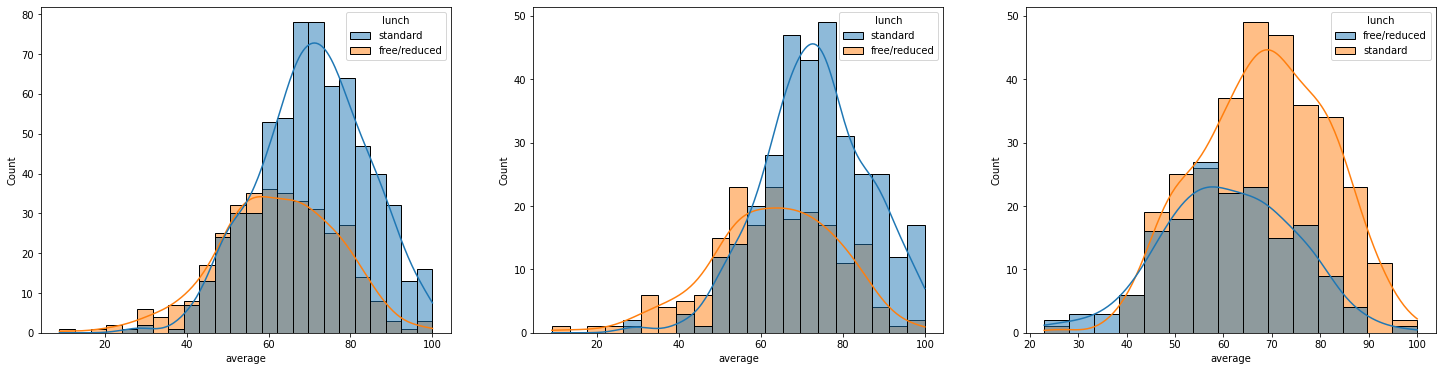

In [47]:
# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

# First subplot (131): Histogram with KDE, grouped by lunch
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch')

# Second subplot (132): Histogram with KDE, grouped by lunch for female students
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch')

# Third subplot (133): Histogram with KDE, grouped by lunch for male students
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch')

plt.show()


Insights
Standard lunch helps perform well in exams.
Standard lunch helps perform well in exams be it a male or a female.

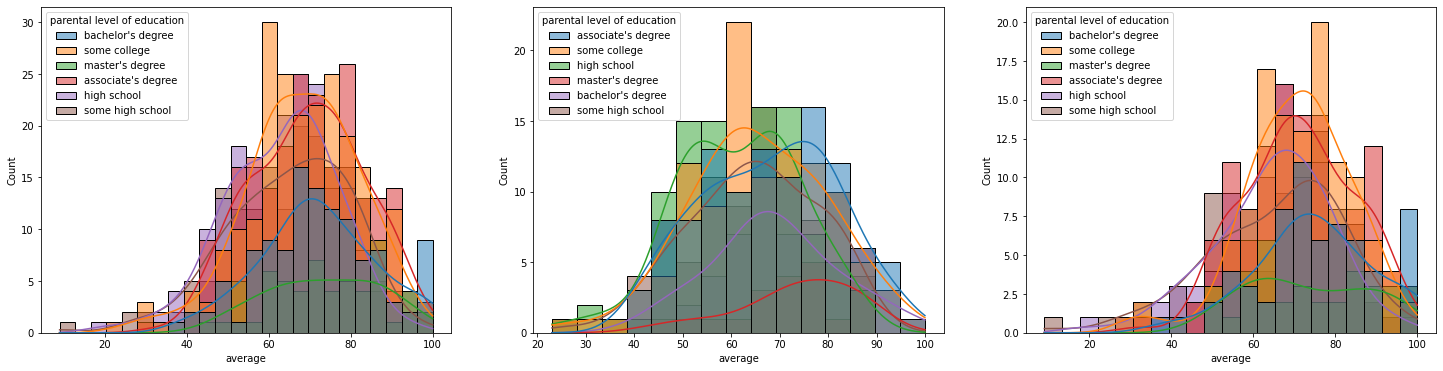

In [48]:
plt.subplots(1, 3, figsize=(25, 6))

# First subplot (131): Histogram with KDE, grouped by parental level of education
plt.subplot(131)
ax = sns.histplot(data=df, x='average', kde=True, hue='parental level of education')

# Second subplot (132): Histogram with KDE, grouped by parental level of education for male students
plt.subplot(132)
ax = sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental level of education')

# Third subplot (133): Histogram with KDE, grouped by parental level of education for female students
plt.subplot(133)
ax = sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental level of education')

plt.show()


Insights
In general parent's education don't help student perform well in exam.
2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
3rd plot we can see there is no effect of parent's education on female students.

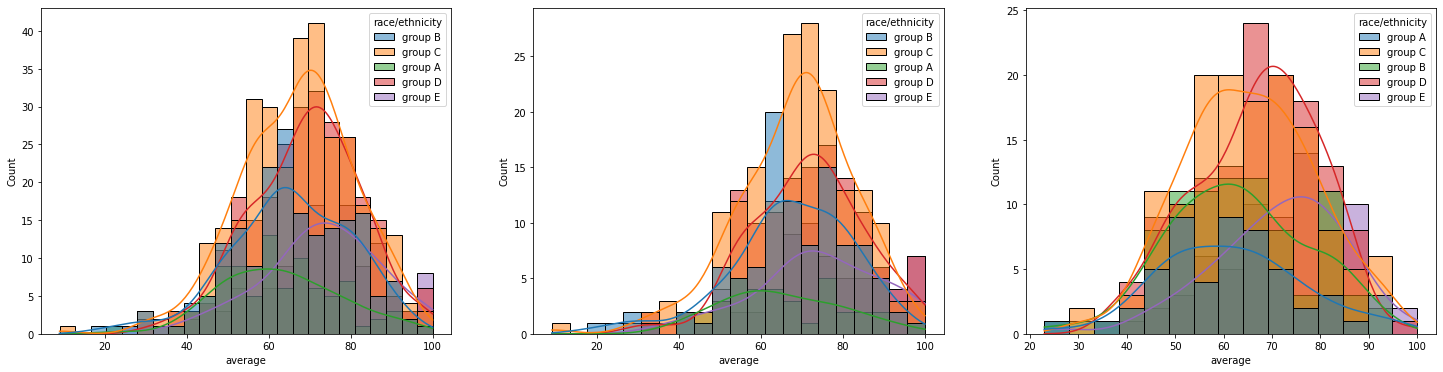

In [49]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

Insights
Students of group A and group B tends to perform poorly in exam.
Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

4.2 Maximumum score of students in all three subjects

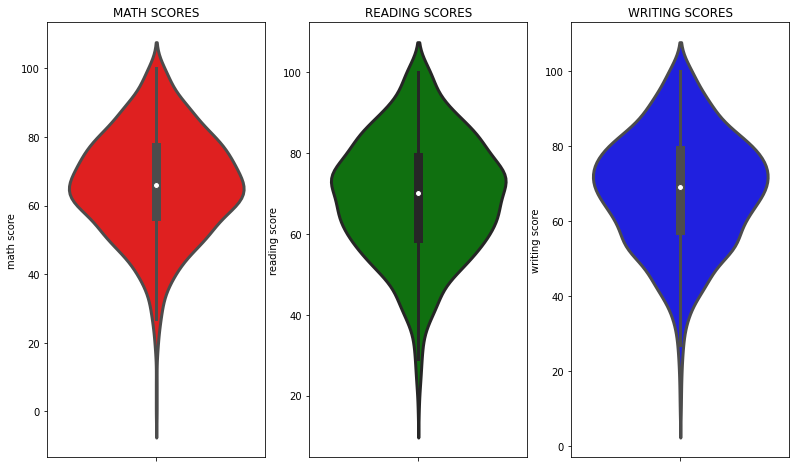

In [52]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

Insights
From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

4.3 Multivariate analysis using pieplot